In [11]:
import numpy as np 
import pandas as pd

In [11]:
# import os

# folder_path = r"C:\Users\Vaishnavi Patil\Downloads\Datasets\archive"
# print(os.listdir(folder_path))

['placement-dataset.csv']


In [12]:
# file_name = 'placement-dataset.csv'
# file_path = os.path.join(folder_path, file_name)

# df = pd.read_csv(file_path)

In [12]:
df = pd.read_csv(r"C:\Users\Vaishnavi Patil\Downloads\Datasets\archive\placement-dataset.csv")

In [13]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [14]:
df.shape

(100, 4)

# Steps:
# 0. Preprocess +EDA +Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train Test Splits
# 4 . train the model
# 5. Evaluate the model /model selection
# 6. Deploy the model

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [16]:
df = df.iloc[:,1:]

In [17]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [18]:
import matplotlib.pyplot as plt

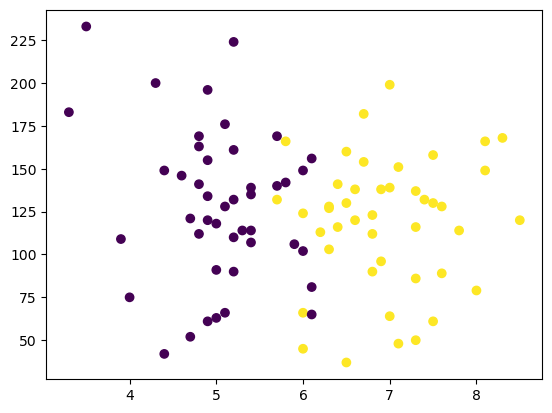

In [19]:
plt.scatter(df['cgpa'], df['iq'] , c=df['placement'])

In [20]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [21]:
x



,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,NaN,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [22]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.1)

In [25]:
y_train

12    0
2     0
43    1
78    0
91    1
     ..
50    0
24    0
28    0
63    1
33    0
Name: placement, Length: 90, dtype: int64

In [26]:
x_train

,cgpa,iq
12,5.4,139.0
2,NaN,121.0
43,NaN,141.0
78,6.1,81.0
91,7.5,158.0
...,...,...
50,3.5,233.0
24,4.7,121.0
28,5.2,90.0
63,6.3,128.0


In [27]:
x_test

,cgpa,iq
0,6.8,123.0
74,6.7,154.0
71,6.1,NaN
39,4.6,146.0
65,8.1,166.0
59,4.8,112.0
5,7.1,48.0
87,5.7,132.0
76,4.9,155.0
55,7.8,114.0


In [35]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
x_train = scaler.fit_transform(x_train)

In [31]:
x_train

array([[-0.46013836,  0.46326551],
       [        nan,  0.08600405],
       [        nan,  0.50518345],
       [ 0.14843173, -0.75235475],
       [ 1.3655719 ,  0.86148594],
       [ 0.8439404 , -0.4379702 ],
       [ 0.58312465,  0.44230654],
       [-0.72095411,  1.23874739],
       [ 0.93087898, -1.10865724],
       [-1.76421711, -0.16550359],
       [ 0.40924748, -0.0187908 ],
       [-0.89483127,  0.35847066],
       [-0.89483127,  0.06504508],
       [ 0.49618606,  0.90340388],
       [ 0.40924748,  0.50518345],
       [-1.67727853,         nan],
       [-0.63401552,  0.92436285],
       [ 0.06149314, -1.0667393 ],
       [ 0.93087898,  1.7208037 ],
       [ 0.06149314,  0.14888096],
       [ 0.67006323,  1.36450121],
       [ 1.27863331,  0.31655272],
       [ 0.06149314, -0.31221638],
       [-2.28584861,  1.38546018],
       [-1.32952419, -1.56975458],
       [ 1.3655719 ,  0.27463478],
       [ 0.14843173,  0.819568  ],
       [ 0.23537031, -0.08166771],
       [-0.63401552,

In [37]:
x_test = scaler.transform(x_test)

In [38]:
x_test

array([[ 0.75700181,  0.12792199],
       [ 0.67006323,  0.77765006],
       [ 0.14843173,         nan],
       [-1.15564702,  0.6099783 ],
       [ 1.8872034 ,  1.0291577 ],
       [-0.98176986, -0.10262668],
       [ 1.01781756, -1.44400076],
       [-0.19932261,  0.31655272],
       [-0.89483127,  0.79860903],
       [ 1.62638765, -0.06070874]])

In [39]:
from sklearn.linear_model  import LogisticRegression

In [40]:
clf = LogisticRegression()

In [57]:
import numpy as np

# Keep only rows without NaNs
mask = ~np.isnan(x_train).any(axis=1)  # True for rows without NaNs
x_train_clean = x_train[mask]
y_train_clean = y_train[mask]

mask = ~np.isnan(x_test).any(axis=1)  # keep rows without NaNs
x_test_clean = x_test[mask]
y_test_clean = y_test[mask]


# Model training

clf.fit(x_train_clean, y_train_clean)


LogisticRegression()

In [54]:
y_pred = clf.predict(x_train_clean)

In [58]:
y_pred = clf.predict(x_test_clean)

In [59]:
y_test

0     1
74    1
71    1
39    0
65    1
59    0
5     1
87    1
76    0
55    1
Name: placement, dtype: int64

In [60]:
from sklearn.metrics  import accuracy_score

In [62]:
accuracy_score (y_test_clean , y_pred)

0.8888888888888888

In [64]:
pip install mlxtend



   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 2.1 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.1 MB/s eta 0:00:00


In [66]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

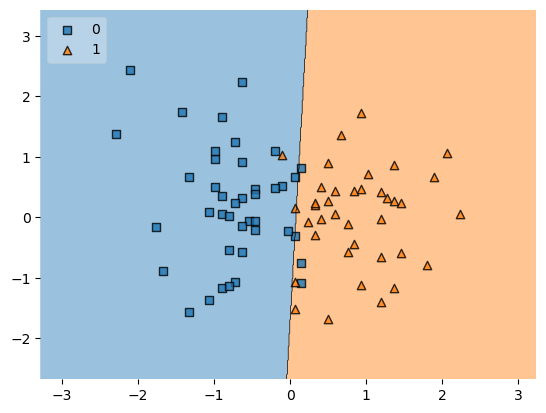

In [69]:
y_train_np = y_train_clean.to_numpy().astype(int)

plot_decision_regions(X=x_train_clean, y=y_train_np, clf=clf, legend=2)

In [70]:
import pickle

In [72]:
pickle.dump(clf, open('model.pkl' , 'wb'))